# Association Rules 

# book.csv dataset

In [1]:
import pandas as pd       # import libraries for Association rules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
book=pd.read_csv('D://ExcelR//Datasets//book.csv')       # reading the data set
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
book.shape

(2000, 11)

In [5]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [6]:
book2=book.iloc[:,5:]     # creating a new database leaving the first 5 colunms (V1,V2,V3,V4,V5) of the actual data set
book2

,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
1995,1,1,1,0,1,1
1996,0,0,0,0,0,0
1997,0,0,0,0,0,0
1998,0,0,0,0,0,0


# Apriori Algorithm

In [7]:
# with 10% support
frequent_itemsets=apriori(book2,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.2410,(ArtBks)
1,0.2760,(GeogBks)
2,0.1135,(ItalCook)
3,0.1085,(Florence)
4,0.1275,"(GeogBks, ArtBks)"


In [8]:
# 70% confidence
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GeogBks),(ArtBks),0.276,0.241,0.1275,0.461957,1.916832,0.060984,1.410667
1,(ArtBks),(GeogBks),0.241,0.276,0.1275,0.529046,1.916832,0.060984,1.537304


In [9]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GeogBks),(ArtBks),0.276,0.241,0.1275,0.461957,1.916832,0.060984,1.410667
1,(ArtBks),(GeogBks),0.241,0.276,0.1275,0.529046,1.916832,0.060984,1.537304


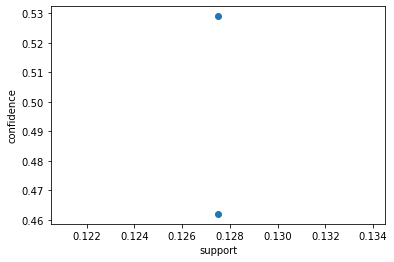

In [10]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [12]:
# with 5% support
frequent_itemsets2=apriori(book2,min_support=0.05,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.2410,(ArtBks)
1,0.2760,(GeogBks)
2,0.1135,(ItalCook)
3,0.1085,(Florence)
4,0.1275,"(GeogBks, ArtBks)"
5,0.0565,"(ItalCook, ArtBks)"
6,0.0640,"(ItalCook, GeogBks)"


In [13]:
# 90% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.9)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GeogBks),(ArtBks),0.2760,0.2410,0.1275,0.461957,1.916832,0.060984,1.410667
1,(ArtBks),(GeogBks),0.2410,0.2760,0.1275,0.529046,1.916832,0.060984,1.537304
2,(ItalCook),(ArtBks),0.1135,0.2410,0.0565,0.497797,2.065549,0.029147,1.511342
3,(ArtBks),(ItalCook),0.2410,0.1135,0.0565,0.234440,2.065549,0.029147,1.157976
4,(ItalCook),(GeogBks),0.1135,0.2760,0.0640,0.563877,2.043031,0.032674,1.660081
5,(GeogBks),(ItalCook),0.2760,0.1135,0.0640,0.231884,2.043031,0.032674,1.154123


In [14]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GeogBks),(ArtBks),0.2760,0.2410,0.1275,0.461957,1.916832,0.060984,1.410667
1,(ArtBks),(GeogBks),0.2410,0.2760,0.1275,0.529046,1.916832,0.060984,1.537304
2,(ItalCook),(ArtBks),0.1135,0.2410,0.0565,0.497797,2.065549,0.029147,1.511342
3,(ArtBks),(ItalCook),0.2410,0.1135,0.0565,0.234440,2.065549,0.029147,1.157976
4,(ItalCook),(GeogBks),0.1135,0.2760,0.0640,0.563877,2.043031,0.032674,1.660081
5,(GeogBks),(ItalCook),0.2760,0.1135,0.0640,0.231884,2.043031,0.032674,1.154123


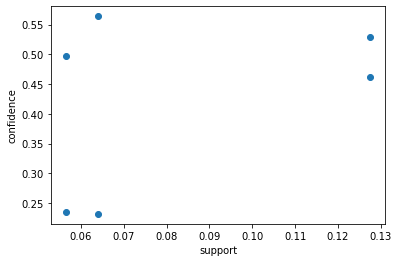

In [15]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()